In [1]:
%matplotlib inline

In [8]:
from ctypes import *
import numpy as np
from matplotlib import pyplot as plt

In [3]:
drs4lib=CDLL('./libdrs4.so')

In [34]:
def get_events(fname=None,start_eventID=0,end_evetID=0):
    try :
        f=open(fname,'r')
        f.close()
    except :
        print("pass a valid filename")
        return

    num=(end_evetID-start_eventID+1)*4*1024*2
    if num<0:
        print("enter valid start_eventID & end_evetID ")
        return None
    s_id=c_int(start_eventID)
    e_id=c_int(end_evetID)
    arr_type=c_double*num
    _waveformData=arr_type()
    drs4lib.get_events(fname.encode('utf-8'),_waveformData,s_id,e_id)
    waveformData=np.ctypeslib.as_array(_waveformData)
    waveformData=waveformData.reshape((end_evetID-start_eventID+1),4,1024,2)
    print(waveformData.nbytes/1024**2 ," MB occupied")
    return waveformData

In [33]:
wd=get_events("muonSingleTrigger00.dat",0,999)

pass a valid filename


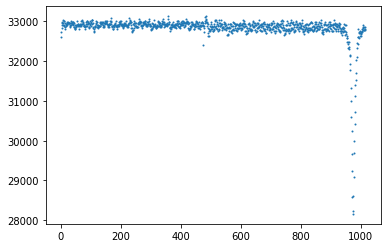

In [16]:
evt=0
ch=0
for ch in [0]:
    xplot=[i[0] for i in wd[evt][ch]]
    yplot=[i[1] for i in wd[evt][ch]]
    plt.scatter(xplot,yplot,s=1)
# plt.xlim([550,700])

In [4]:
fname="muonSingleTrigger2.dat"
start_eventID=0
end_evetID=1

In [14]:
num=(end_evetID-start_eventID+1)*4*1024*2
if num<0:
    print("enter valid start_eventID & end_evetID ")
s_id=c_int(start_eventID)
e_id=c_int(end_evetID)
arr_type=c_double*num
_waveformData=arr_type()
drs4lib.get_events(fname.encode('utf-8'),_waveformData,s_id,e_id)
waveformData=np.ctypeslib.as_array(_waveformData)
waveformData2=waveformData.reshape((end_evetID-start_eventID+1),4,1024,2)
waveformData2;


In [22]:
_waveformData[4]

1.0

In [10]:
np.amin(waveformData2)

0.0

In [40]:
a=np.array([i for i in range(30)])

In [41]:
an=a.reshape((2,5,3))

In [42]:
an

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]],

       [[15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]]])

In [62]:
t[2047]

32865.0

In [4]:
ap=pointer(c_double())

double * get_events( const char * fname="",int start_eventID=0,int end_evetID=-1);

In [5]:
s = create_string_buffer(b'hello')
print(s,repr(s.raw))

<ctypes.c_char_Array_6 object at 0x7f98ef86e9d8> b'hello\x00'


In [6]:
s.value

b'hello'

In [3]:
stri='muonSingleTrigger2.dat'

In [4]:
filename=create_string_buffer(stri.encode('utf-8'))

In [5]:
s=c_int(0)
e=c_int(1)
num=(e.value-s.value+1)*4*1024*2
arr_type=c_double*num
x=arr_type()
drs4lib.get_events(filename,x,0,1)

0

In [7]:
x[1]

32603.0

In [44]:
wd=np.ctypeslib.as_array(x)

In [47]:
wdn=wd.reshape(2,4,1024,2)

In [48]:
wd

array([0.00000000e+00, 3.26030000e+04, 9.92838562e-01, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [52]:
wdn[0][0][0]

array([    0., 32603.])